<a href="https://colab.research.google.com/github/Sumathi-G/Data_scientist/blob/main/forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
file_name = '/content/realistic_housing_data.xlsx'
df = pd.read_excel(file_name)
df.head()

,bedrooms,bathrooms,sqft,lot_size,age,year_built,garage,location,house_type,condition,has_pool,has_fireplace,has_basement,school_rating,price
0,3,5,2229,12569,38,1986,1,Rural,Condo,4,0,1,0,10,199148
1,3,2,1897,8942,27,1997,3,Rural,Townhouse,3,0,0,1,3,152932
2,4,2,2397,4826,46,1978,0,Downtown,Townhouse,2,0,0,0,6,230854
3,5,3,2849,2490,39,1985,2,Hills,House,3,0,1,1,4,263271
4,2,3,1895,11910,41,1983,1,Downtown,Townhouse,4,0,0,0,5,274804


In [3]:
print(f"\n Dataset Shape: {df.shape}")
print(f"Features :{df.columns.tolist()}")


 Dataset Shape: (5000, 15)
Features :['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built', 'garage', 'location', 'house_type', 'condition', 'has_pool', 'has_fireplace', 'has_basement', 'school_rating', 'price']


In [4]:
print("\n df.info():")
print(df.info())


 df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       5000 non-null   int64 
 1   bathrooms      5000 non-null   int64 
 2   sqft           5000 non-null   int64 
 3   lot_size       5000 non-null   int64 
 4   age            5000 non-null   int64 
 5   year_built     5000 non-null   int64 
 6   garage         5000 non-null   int64 
 7   location       5000 non-null   object
 8   house_type     5000 non-null   object
 9   condition      5000 non-null   int64 
 10  has_pool       5000 non-null   int64 
 11  has_fireplace  5000 non-null   int64 
 12  has_basement   5000 non-null   int64 
 13  school_rating  5000 non-null   int64 
 14  price          5000 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 586.1+ KB
None


In [5]:
print("\n df.describe():")
print(df.describe())


 df.describe():
         bedrooms    bathrooms         sqft      lot_size          age  \
count  5000.00000  5000.000000  5000.000000   5000.000000  5000.000000   
mean      3.20160     2.410600  2160.496600   8090.264200    24.581000   
std       1.28019     1.066881   436.624535   3021.882128    14.316132   
min       1.00000     1.000000   858.000000   1000.000000     0.000000   
25%       2.00000     2.000000  1851.000000   5918.250000    12.000000   
50%       3.00000     2.000000  2153.000000   8124.000000    25.000000   
75%       4.00000     3.000000  2455.250000  10211.000000    37.000000   
max       6.00000     5.000000  3620.000000  19332.000000    49.000000   

        year_built       garage    condition     has_pool  has_fireplace  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean   1999.419000     1.384600     3.259600     0.197000       0.404400   
std      14.316132     0.904238     0.975089     0.397772       0.490825   
min    1975.

In [6]:
df.isnull().sum()

,0
bedrooms,0
bathrooms,0
sqft,0
lot_size,0
age,0
year_built,0
garage,0
location,0
house_type,0
condition,0


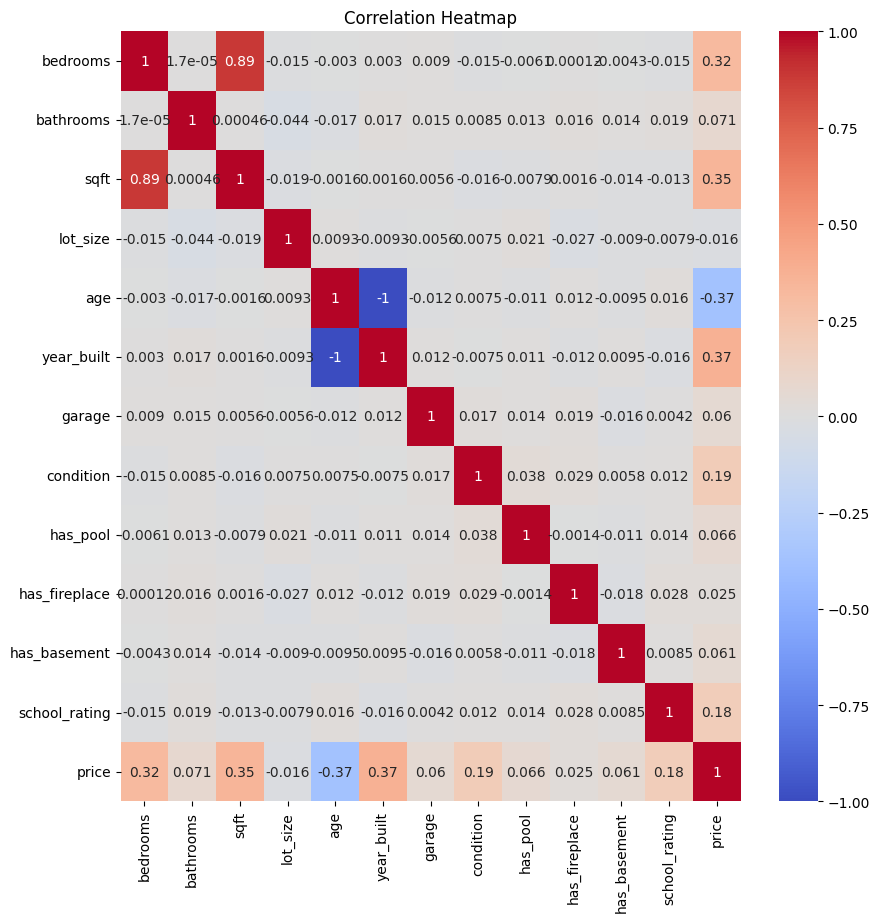

In [9]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
x = df.drop('price', axis=1)
y = df['price']
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns

In [12]:
print("Categorical Features:")
print(categorical_features)
print("\nNumerical Features:")
print(numerical_features)

Categorical Features:
Index(['location', 'house_type'], dtype='object')

Numerical Features:
Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built',
       'garage', 'condition', 'has_pool', 'has_fireplace', 'has_basement',
       'school_rating'],
      dtype='object')


In [24]:

preprocessor = ColumnTransformer(
    transformers=[
        ('One hot', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scale', StandardScaler(), numerical_features)
    ])

In [25]:
print(preprocessor)

ColumnTransformer(transformers=[('One hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['location', 'house_type'], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built',
       'garage', 'condition', 'has_pool', 'has_fireplace', 'has_basement',
       'school_rating'],
      dtype='object'))])


In [31]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state= 42))
                           ])

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('One hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['location', 'house_type'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built',
       'garage', 'condition', 'has_pool', 'has_fireplace', 'has_basement',
       'school_rating'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [37]:
y_pred = pipeline.predict(x_test)
print(y_pred)

[373313.62 280188.96 240659.32 264503.98 277720.25 206818.57 209572.11
 500722.33 219806.63 503801.85 314426.96 484701.37 563878.68 478188.53
 209879.54 297724.08 340918.72 329345.65 168677.39 237548.53 365223.41
 227484.86 392917.42 312338.45 627169.13 499438.38 277526.91 317392.41
 285351.17 259265.08 240524.26 483184.8  249461.74 349208.03 382441.29
 224436.83 268428.49 642225.38 224863.63 210956.2  139556.96 160080.54
 327533.57 272921.11 159576.65 394614.13 529865.35 212032.83 157107.69
 439349.04 548291.27 201595.43 282360.19 284626.5  628375.43 276847.25
 413476.56 403446.2  395668.75 285114.3  305324.11 578874.65 177299.69
 426969.59 426551.79 158447.94 437611.88 355442.88 328515.86 393628.72
 339159.08 146243.55 347183.61 272928.84 138938.13 540353.15 160096.52
 210701.95 275983.79 477150.65 265832.14 374607.47 217067.21 139142.3
 228770.13 550455.81 327066.83 777522.29 290614.71 493263.19 362373.41
 349336.12 521461.32 383896.69 383872.7  225182.74 422514.83 236444.62
 335196

In [40]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ${mae:2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared: ${r2:.2f}")

Mean Absolute Error: $38710.337100
Root Mean Squared Error: $52685.84
R-squared: $0.88


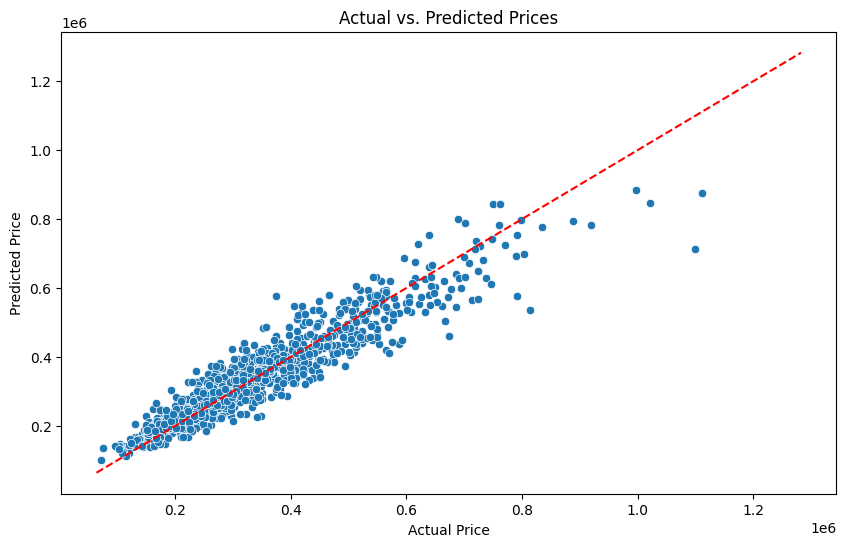

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()],'--r' )
plt.show()